### House Price Prediction

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train = pd.read_csv('../../../datasets/train.csv')
test = pd.read_csv('../../../datasets/test.csv')

In [19]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


In [20]:
train['source'] = 'train'
test['source'] = 'test'

In [21]:
test['SalePrice'] = None

In [22]:
data = pd.concat([train, test], ignore_index=True)

print("Combined data shape:", data.shape)

Combined data shape: (2919, 82)


In [23]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [24]:
data.duplicated().sum()


0

In [25]:
# Dropping Unnecessary Columns

test_ids = data[data['source'] == 'test']['Id']


data.drop(['Id'], axis=1, inplace=True)

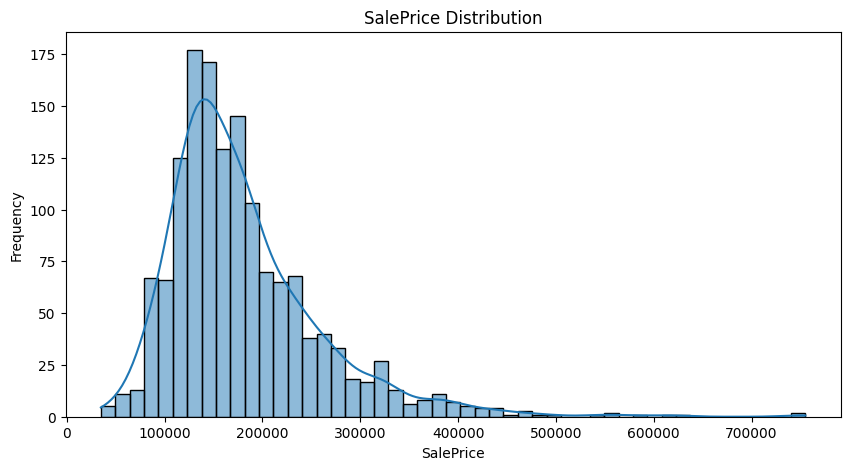

In [26]:
# Plot distribution of SalePrice

plt.figure(figsize=(10,5))
sns.histplot(data[data['source'] == 'train']['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Describe SalePrice
data[data['source'] == 'train']['SalePrice'].describe()

count       1460
unique       663
top       140000
freq          20
Name: SalePrice, dtype: int64

In [29]:
test['SalePrice'] = None


In [30]:
# Convert SalePrice to float
data['SalePrice'] = pd.to_numeric(data['SalePrice'], errors='coerce')

# Now recalculate numeric features
numeric_feats = data.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix using only training data
corr = data[data['source'] == 'train'][numeric_feats].corr()

# Top correlations with SalePrice
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [31]:
# Get numeric columns
numeric_feats = data.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr = data[data['source'] == 'train'][numeric_feats].corr()

# Top correlations with SalePrice
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


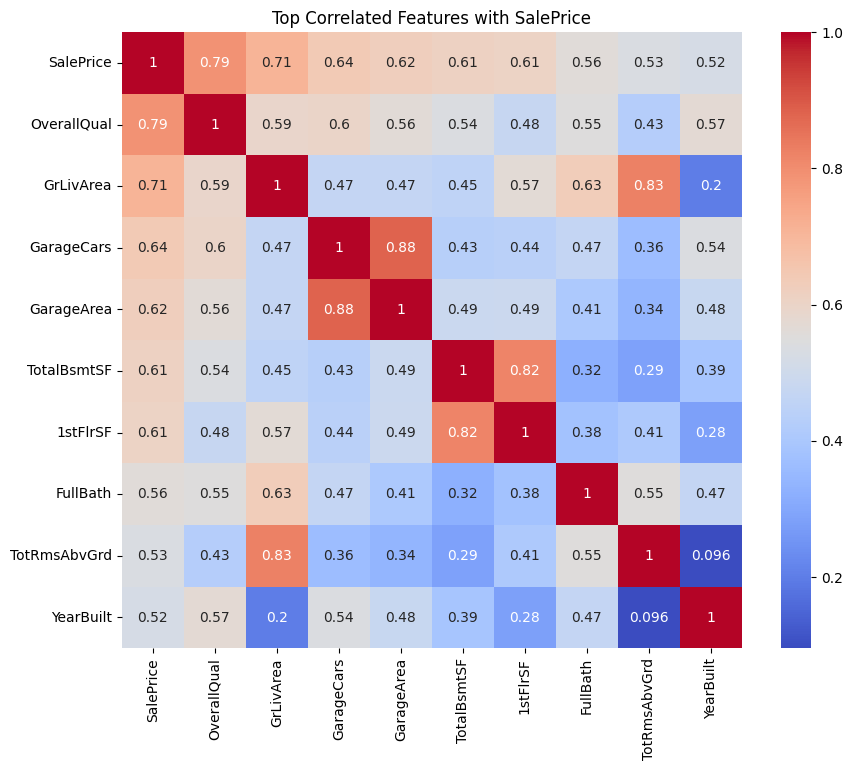

In [32]:
# Plot heatmap of top features correlated with SalePrice
top_features = top_corr.index
plt.figure(figsize=(10,8))
sns.heatmap(data[data['source'] == 'train'][top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()


In [33]:
# Categorical columns (object type)
categorical_feats = data.select_dtypes(include='object').columns.tolist()

print("Total categorical features:", len(categorical_feats))
print(categorical_feats)


Total categorical features: 44
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'source']


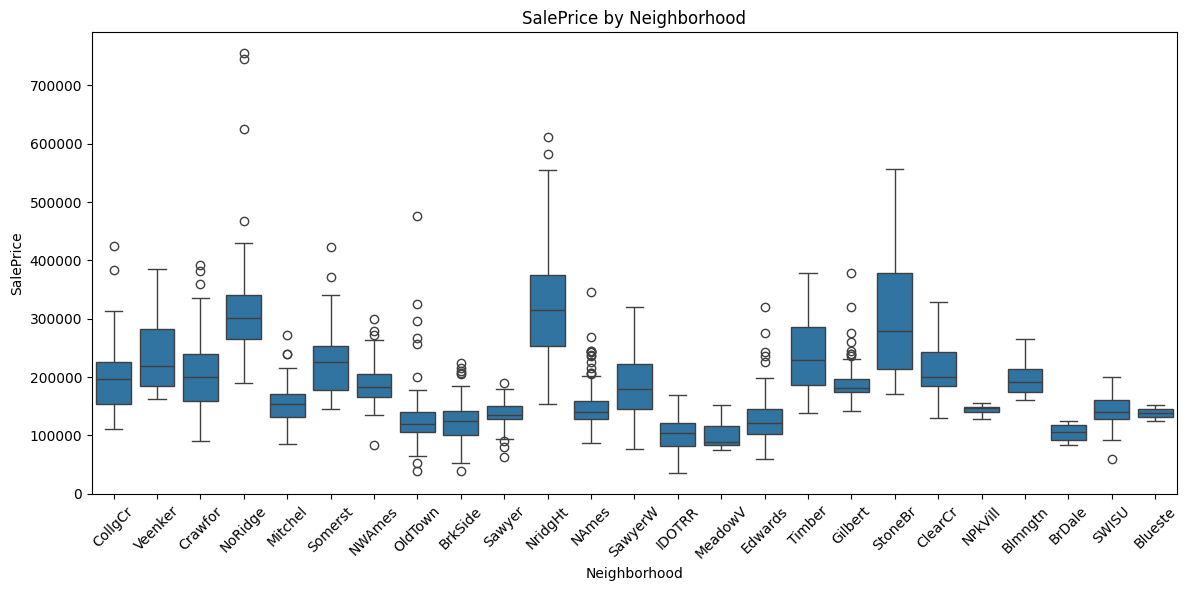

In [34]:
# Boxplot for 'Neighborhood' vs SalePrice
plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data[data['source']=='train'])
plt.xticks(rotation=45)
plt.title('SalePrice by Neighborhood')
plt.show()


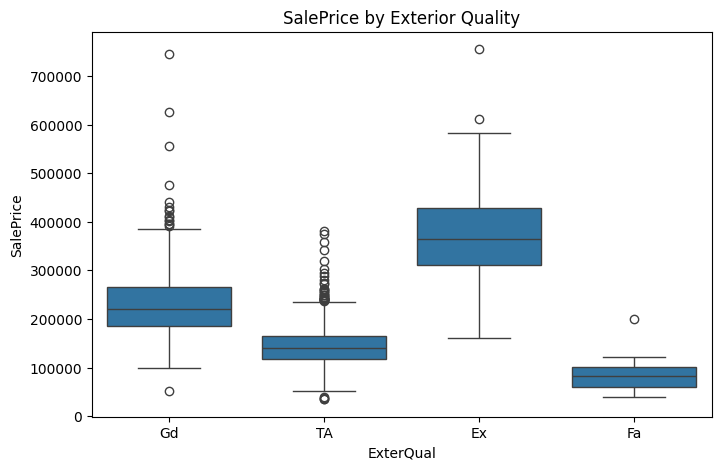

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ExterQual', y='SalePrice', data=data[data['source']=='train'])
plt.title('SalePrice by Exterior Quality')
plt.show()


In [37]:
from scipy.stats import skew
import numpy as np

# Recalculate numeric features
numeric_feats = data.select_dtypes(include=['int64', 'float64']).drop(['SalePrice'], axis=1)

# Check skewness
skewed_feats = data[numeric_feats.columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 0.75]
print("Skewed features:\n", high_skew)

# Apply log1p (log(1 + x)) to reduce skew
for col in high_skew.index:
    data[col] = np.log1p(data[col])


Skewed features:
 MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162285
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
dtype: float64


In [38]:
# Apply log1p transformation to target
data['SalePrice'] = data['SalePrice'].apply(lambda x: np.log1p(x) if pd.notnull(x) else x)


In [39]:
qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

for col in ['ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC']:
    data[col] = data[col].map(qual_mapping)


In [40]:
# One-hot encode remaining categorical features
data = pd.get_dummies(data, columns=[col for col in categorical_feats if col not in qual_mapping], drop_first=True)


In [41]:
# Check missing values count in each column
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64


In [43]:
# Example: Fill missing categorical columns BEFORE encoding
for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 
            'Fence', 'MiscFeature']:
    if col in data.columns:
        data[col] = data[col].fillna('None')

# Fill basement numeric missing with 0 BEFORE encoding
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# Fill other missing numeric with median BEFORE encoding
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
for col in missing.index:
    if data[col].dtype in ['float64', 'int64']:
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])


In [44]:
# Label encode ordinal cols (as before)
qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
for col in ['ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC']:
    if col in data.columns:
        data[col] = data[col].map(qual_mapping)

# One-hot encode remaining categorical columns
categorical_feats = data.select_dtypes(include='object').columns.tolist()
data = pd.get_dummies(data, columns=categorical_feats, drop_first=True)


In [45]:
print(data.isnull().sum().sum())  # Should be 0 if all handled


0


In [47]:
train['source'] = 'train'
test['source'] = 'test'

In [48]:
data = pd.concat([train, test], ignore_index=True)


In [49]:
# After merging with source column
train = data[data['source'] == 'train'].drop(['source'], axis=1)
test = data[data['source'] == 'test'].drop(['source', 'SalePrice'], axis=1)
